In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_rel

%matplotlib inline

In [2]:
xl = pd.ExcelFile("C:/computer_harddrive/HPLC_history/LineP_satellite_coverage_AP.xlsx")
df = xl.parse("HPLC-pigments")
df['DP'] = (1.41*df['fucox']+1.41*df['peri']+1.27*df['hex']+0.6*df['allox']
            +0.35*df['but']+1.01*df['chl_b']+0.86*df['zeax'])
df = df.replace(0.000000, np.nan)
df

,Cruise,Station,lat,lon,date,time-UTC,depth,chlc3,chlc2,peri,...,prasinox,violax,hex,allox,zeax,lutein,chl_b,chl_a,chl_field,DP
0,2007-01,P4,48°39.02,126°40.02,2007-02-09,16:48:00,5,0.051801,0.078227,NaN,...,0.015414,NaN,0.082732,0.046542,0.006097,NaN,0.091276,0.675707,NaN,0.375106
1,2007-01,P20,49°33.98,138°40.05,2007-02-13,16:01:00,5,0.073385,0.080686,NaN,...,NaN,0.004600,0.135631,NaN,0.006813,0.008378,0.100486,0.506063,NaN,0.435963
2,2007-15,P4,48°39.08,126°39.88,2007-08-16,23:18:00,5,NaN,NaN,NaN,...,0.020285,0.018997,0.006114,NaN,0.146888,NaN,0.061294,0.297357,NaN,0.226012
3,2007-15,P12,48°58.22,130°39.95,2007-08-18,14:45:00,5,NaN,0.025404,NaN,...,NaN,NaN,0.055200,NaN,NaN,NaN,NaN,0.181563,NaN,0.105703
4,2009-10,P4,48°39.32,126°39.25,2009-08-21,15:41:00,5,0.143230,0.511424,0.440332,...,0.029005,0.316994,0.259191,0.116808,0.191541,NaN,0.199593,3.755911,NaN,3.498121
5,2009-10,P12,48°58.13,130°40.08,2009-08-23,13:44:00,5,NaN,0.019695,NaN,...,NaN,NaN,0.097736,NaN,NaN,NaN,0.029929,0.193433,NaN,0.178766
6,2009-10,P20,49°34.05,138°39.95,2009-08-26,10:38:00,5,NaN,0.012017,NaN,...,NaN,NaN,0.059629,NaN,NaN,NaN,0.039133,0.148021,NaN,0.148659
7,2010-01,P20,49°33.98,138°40.00,2010-02-08,13:53:00,5,0.040522,0.038461,0.020227,...,NaN,NaN,0.115306,NaN,NaN,NaN,0.041300,0.318698,NaN,0.347517
8,2010-14,P4,48°39.00,126°40.02,2010-08-20,15:43:00,5,0.151512,0.391911,0.205776,...,0.029083,0.026534,0.123090,0.066721,0.053503,0.010946,0.210201,2.356861,NaN,1.944245
9,2010-14,P5,48°41.51,127°09.90,2010-08-20,23:17:00,5,0.467758,1.258812,0.190195,...,0.051701,0.036372,0.455060,0.186629,0.021577,NaN,0.368440,5.642980,NaN,6.092411


In [3]:
df.loc[:,['Cruise','Station','peri']].head()

,Cruise,Station,peri
0,2007-01,P4,NaN
1,2007-01,P20,NaN
2,2007-15,P4,NaN
3,2007-15,P12,NaN
4,2009-10,P4,0.440332


In [4]:
df['micro_chl'] = 1./ (0.9117 + np.exp (-2.7330*np.log10(df['chl_a']) + 0.4003))
df['diatom_chl'] = 1./ (1.3272 + np.exp (-3.9828*np.log10(df['chl_a']) + 0.1953)) 
df['dino_chl'] = df['micro_chl']-df['diatom_chl']

df['pico_chl'] = (-1./ (0.1529 + np.exp (1.0306* np.log10(df['chl_a']) 
                                         - 1.5576)) - 1.8597*np.log10(df['chl_a']) +2.9954)
df['prokaryotes_chl'] = ((0.0067/0.6154/df['chl_a'])*np.exp(-19.5190*((np.log10(df['chl_a']) + 0.9643)**2)/(0.0067**2)) 
                  + 0.1027*(np.log10(df['chl_a'])**2) -0.1189*np.log10(df['chl_a']) +0.0626)
df['picoeukaryotes_chl'] = df['pico_chl']-df['prokaryotes_chl']
                  
df['nano_chl'] = 1-df['pico_chl']-df['micro_chl']
df['greenalgae_chl'] = (0.2490/df['chl_a']) * np.exp(-1.2621*(np.log10(df['chl_a'])-0.5523)**2)
df['prymnesiophytes_chl'] = df['nano_chl']-df['greenalgae_chl']

df.loc[:,'DP':].head()

,DP,micro_chl,diatom_chl,dino_chl,pico_chl,prokaryotes_chl,picoeukaryotes_chl,nano_chl,greenalgae_chl,prymnesiophytes_chl
0,0.375106,0.304130,0.268666,0.035465,0.278426,0.085818,0.192608,0.417444,0.190671,0.226773
1,0.435963,0.234695,0.189540,0.045154,0.300762,0.106756,0.194007,0.464543,0.198495,0.266049
2,0.226012,0.138751,0.089023,0.049728,0.342578,0.153720,0.188858,0.518671,0.192641,0.326030
3,0.105703,0.081845,0.040683,0.041162,0.390135,0.207088,0.183047,0.528020,0.166114,0.361906
4,3.498121,0.818368,0.689449,0.128919,0.053134,0.028188,0.024946,0.128498,0.066253,0.062244


In [6]:
sns.set_style("ticks")
fig = plt.figure(figsize=(6, 4))
marker = ['o', '.', '*', 'v', '^', '<', '>', 's', 'd']
sp = ['micro','diatom','dino','pico','prokaryotes','picoeukaryotes','nano',
      'greenalgae','prymnesiophytes']

for si in zip(sp, marker):
    subdf = df['event_no'=='160']
    x = pd.Dataframe()
    x = sufdf['%s' % (si)]
    
    y = df['%s_chl' % (si)]
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
    plt.plot(df['%s' % (si)],df['%s_chl' % (si)],m, 
             label='%s R=%.2f' % (si, np.sqrt(std_err)) )
    #np.sqrt(np.nanmean(df['%s_diff_field' % (si)]))

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.05))
plt.xlabel('DPA taxonomy%')
plt.ylabel('[chl] taxonomy%')
plt.gca().set_aspect('equal', adjustable='box')

KeyError: False

In [ ]:
df['micro_chl_field'] = 1./ (0.9117 + np.exp (-2.7330*np.log10(df['chl_field']) + 0.4003))
df['micro_diff_field'] = (df['micro'] - df['micro_chl_field']) ** 2

df['diatom_chl_field'] = 1./ (1.3272 + np.exp (-3.9828*np.log10(df['chl_field']) + 0.1953)) 
df['diatom_diff_field'] = (df['diatom'] - df['diatom_chl_field']) ** 2

df['dino_chl_field'] = df['micro_chl_field']-df['diatom_chl_field']
df['dino_diff_field'] = (df['dino'] - df['dino_chl_field']) ** 2

df['pico_chl_field'] = (-1./ (0.1529 + np.exp (1.0306* np.log10(df['chl_field']) 
                                         - 1.5576)) - 1.8597*np.log10(df['chl_field']) +2.9954)
df['pico_diff_field'] = (df['pico'] - df['pico_chl_field']) ** 2

df['prokaryotes_chl_field'] = ((0.0067/0.6154/df['chl_field'])*np.exp(-19.5190*((np.log10(df['chl_field']) + 0.9643)**2)/(0.0067**2)) 
                  + 0.1027*(np.log10(df['chl_field'])**2) -0.1189*np.log10(df['chl_field']) +0.0626)
df['prokaryotes_diff_field'] = (df['prokaryotes'] - df['prokaryotes_chl_field']) ** 2

df['picoeukaryotes_chl_field'] = df['pico_chl_field']-df['prokaryotes_chl_field']
df['picoeukaryotes_diff_field'] = (df['picoeukaryotes'] - df['picoeukaryotes_chl_field']) ** 2

df['nano_chl_field'] = 1-df['pico_chl_field']-df['micro_chl_field']
df['nano_diff_field'] = (df['nano'] - df['nano_chl_field']) ** 2

df['greenalgae_chl_field'] = (0.2490/df['chl_field']) * np.exp(-1.2621*(
        np.log10(df['chl_field'])-0.5523)**2)
df['greenalgae_diff_field'] = (df['greenalgae'] - df['greenalgae_chl_field']) ** 2

df['prymnesiophytes_chl_field'] = df['nano_chl_field']-df['greenalgae_chl_field']
df['prymnesiophytes_diff_field'] = (df['prymnesiophytes'] - df['prymnesiophytes_chl_field']) ** 2

df.loc[:,'DP':].head()

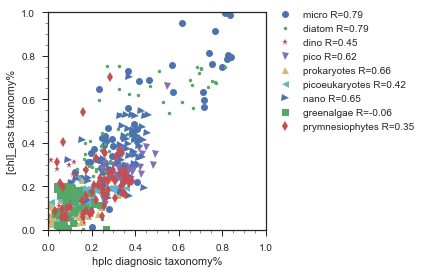

In [36]:
sns.set_style("ticks")
fig = plt.figure(figsize=(6, 4))
marker = ['o', '.', '*', 'v', '^', '<', '>', 's', 'd']
sp = ['micro','diatom','dino','pico','prokaryotes','picoeukaryotes','nano',
      'greenalgae','prymnesiophytes']

for si, m in zip(sp, marker):
    x = df['%s' % (si)]
    y = df['%s_chl_field' % (si)]
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
    plt.plot(df['%s' % (si)],df['%s_chl_field' % (si)],m, 
             label='%s R=%.2f' % (si,  np.sqrt(std_err)) )
    #np.sqrt(np.nanmean(df['%s_diff_field' % (si)]))

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.legend(numpoints=1, bbox_to_anchor=(1.0, 1.05))
plt.xlabel('hplc diagnosic taxonomy%')
plt.ylabel('[chl]_acs taxonomy%')
plt.gca().set_aspect('equal', adjustable='box')
plt.minorticks_on()

In [13]:
sp = ['micro','diatom','dino','pico','prokaryotes','picoeukaryotes','nano',
      'greenalgae','prymnesiophytes']

for si in sp:
    print(ttest_rel(df['%s' % (si)],df['%s_chl_field' % (si)], nan_policy='omit'))

Ttest_relResult(statistic=-3.9200235485250103, pvalue=0.00022676663941605918)
Ttest_relResult(statistic=-3.460581039153598, pvalue=0.00098986516555122956)
Ttest_relResult(statistic=-2.6766249566912306, pvalue=0.0095385131005846294)
Ttest_relResult(statistic=4.3420549123192727, pvalue=5.4138720038362981e-05)
Ttest_relResult(statistic=0.69611872175377376, pvalue=0.48899844148819593)
Ttest_relResult(statistic=3.8149129284634, pvalue=0.00032036450681667349)
Ttest_relResult(statistic=-1.267358889144923, pvalue=0.20984393378988195)
Ttest_relResult(statistic=-3.792461705163328, pvalue=0.00034468962070189003)
Ttest_relResult(statistic=1.3455420597909726, pvalue=0.18343061613458467)


In [14]:
import scipy
sp = ['micro','diatom','dino','pico','prokaryotes','picoeukaryotes','nano',
      'greenalgae','prymnesiophytes']

for si in sp:
    x = df['%s' % (si)]
    y = df['%s_chl_field' % (si)]
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
    print('%s' % (si), slope, intercept, r_value, p_value, std_err)


micro 0.987195215661 0.0916752491354 0.794840296602 1.23116753916e-14 0.0972985743734
diatom 0.856109087081 0.113097207631 0.791297530008 1.94753495089e-14 0.0854006801592
dino 1.06226744269 0.021224395236 0.450225181045 0.000240990273042 0.271981025807
pico 1.11546832683 -0.134970966882 0.618862352663 8.27107944698e-08 0.182782006367
prokaryotes 0.511601886353 0.0374107285934 0.660262871392 5.27578924739e-09 0.0751276093943
picoeukaryotes 0.978797168439 -0.0941478135802 0.421537346335 0.000644540912776 0.271830273198
nano 0.798034357894 0.0825070312138 0.645874421036 1.43953470317e-08 0.121779693239
greenalgae -0.0780335063622 0.144357388445 -0.0599567821323 0.643429385307 0.167720122029
prymnesiophytes 0.405530395579 0.112562697379 0.354789491983 0.00466297214313 0.137963328359


In [30]:
import scipy
sp = ['micro','diatom','dino','pico','prokaryotes','picoeukaryotes','nano',
      'greenalgae','prymnesiophytes']

for si in sp:
    x = df['%s' % (si)]
    y = df['%s_chl' % (si)]
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
    print('%s' % (si), slope, intercept, r_value, p_value, std_err)


micro 1.05624797741 -0.0583491638703 0.851549665096 2.69775016964e-23 0.0741086358423
diatom 1.00526198241 -0.0583501067338 0.870452921449 2.08489518965e-34 0.0552164194685
dino 0.359227439904 0.0426154598698 0.245947032122 0.0288990679559 0.161336737743
pico 0.948280914933 -0.0157848958562 0.718670713914 3.17628934837e-15 0.0989376628987
prokaryotes 0.367835458926 0.0738540096445 0.57757334896 3.83101400397e-09 0.0560618799377
picoeukaryotes 0.688231496286 0.0078510952705 0.497222715232 4.39851132744e-08 0.116643805005
nano 0.815687665259 0.117671526413 0.711767597911 2.4064376441e-12 0.0962122702885
greenalgae 0.240402251536 0.132670909804 0.308634406762 0.00135869691657 0.0730026503115
prymnesiophytes 0.530330194525 0.111033750737 0.569715763474 1.76028765193e-07 0.0914381279896
